In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
# Change directory
%cd /content/drive/My Drive/Colab Notebooks/Base10

/content/drive/My Drive/Colab Notebooks/Base10


In [4]:
!ls

Base10_LinearModel.ipynb  dataset.csv  Data_Viz.ipynb


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')
#features = len(data.columns)
data.head()

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age,test
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


# Target & Features

In [63]:
#Separate the Target variable test from features
y=data.test
x= data.drop(["test"],axis=1)
print(len(x.columns))

7


In [64]:
x

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63
764,2,122,70,0,36.8,0.340,27
765,5,121,72,112,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


No of patients positive for diabetes 268
No of patients negative for diabetes 500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


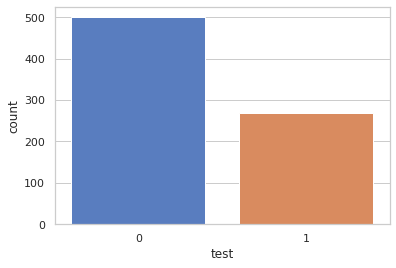

In [65]:
#plot the test distribution
ax=sns.countplot(y,label="count")
N,P=y.value_counts()
print("No of patients positive for diabetes", P)
print("No of patients negative for diabetes", N)

In [66]:
data.head()

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age,test
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


# Pregnancy & Diabetes Test

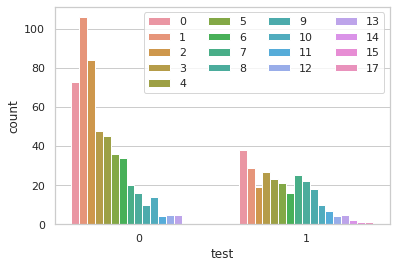

In [69]:
grouped_df = data.groupby(['pregnant', 'test']).size().reset_index(name='count') 
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="test", y="count", hue="pregnant", data=grouped_df)
plt.setp(ax.get_legend().get_texts(), fontsize='4') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='4') # for legend title
plt.legend(ncol=4)
plt.show()

# Age & Diabetes

Age has been changed to buckets of age where label 1 = age from 20 to 31 , label2 = age from 31 to 41 and so on

In [71]:
data1=data

In [72]:
data1["ageB"]=pd.cut(
    data1['age'],bins=[20,31,41,51,61,71,82],labels=[1,2,3,4,5,6]
)

In [73]:
data1.head()

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age,test,ageB
0,6,148,72,0,33.6,0.627,50,1,3
1,1,85,66,0,26.6,0.351,31,0,1
2,8,183,64,0,23.3,0.672,32,1,2
3,1,89,66,94,28.1,0.167,21,0,1
4,0,137,40,168,43.1,2.288,33,1,2


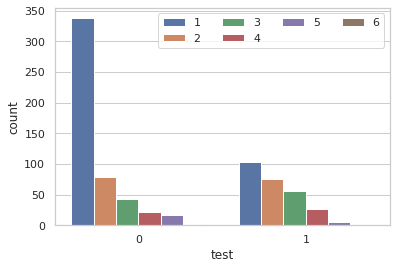

In [74]:
grouped_df = data1.groupby(['ageB', 'test']).size().reset_index(name='count') 
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="test", y="count", hue="ageB", data=grouped_df)
plt.setp(ax.get_legend().get_texts(), fontsize='4') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='4') # for legend title
plt.legend(ncol=4)
plt.show()

Observations:
As age increases in label 3 & 4 (41-61) the number of diabetes patients is also more in this category - we can find the odds ratio to exactly find the age at which the probability of a person becoming diabetic(1) from non diabetic(0) is more than 70% for a further analysis

# **Note 1 - We will have to balance the class before we do modelling**

In [68]:
#Check the null values
x.isna().sum()


pregnant     0
glucose      0
diastolic    0
insulin      0
bmi          0
diabetes     0
age          0
dtype: int64

In [36]:
#Check if we need to standardize the values before modelling
x.describe()

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000


In [45]:
data.head()

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


In [29]:
# #Convert Age into buckets (age is from 21-81 years in the dataset)
# data["ageB"]=pd.cut(
#     data['age'],bins=[20,31,41,51,61,71,82],labels=[1,2,3,4,5,6]
# )

In [ ]:
#Age should be kept as it is because we are working on a linear model

# Box plot

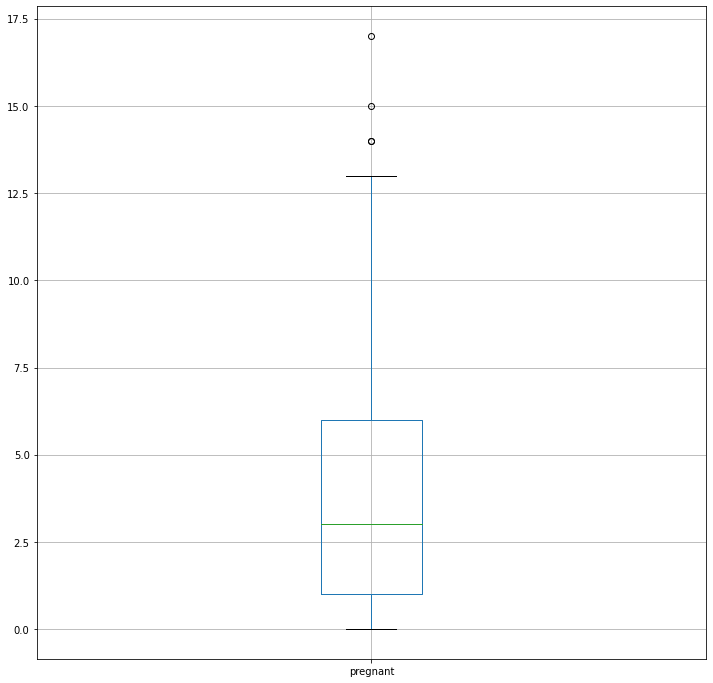

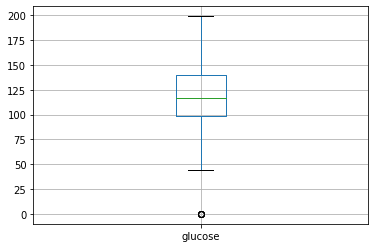

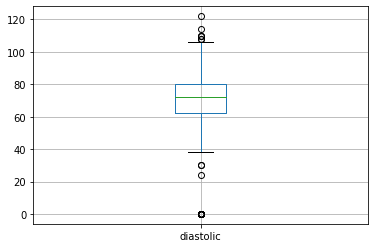

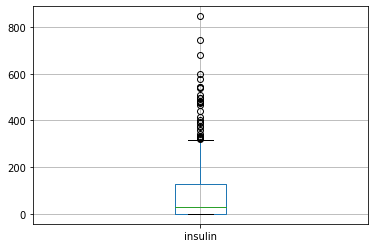

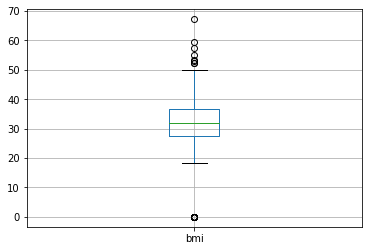

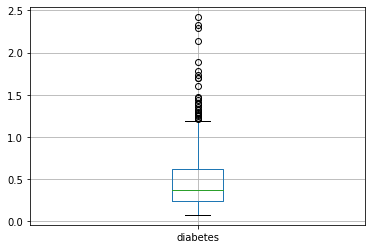

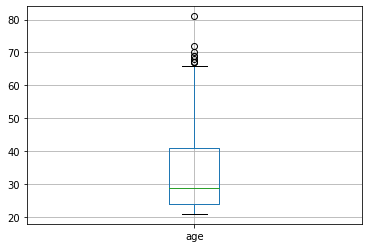

In [39]:
# Box plot to check the outliers
plt.figure(figsize=(12,12))
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

# Histogram Distribution

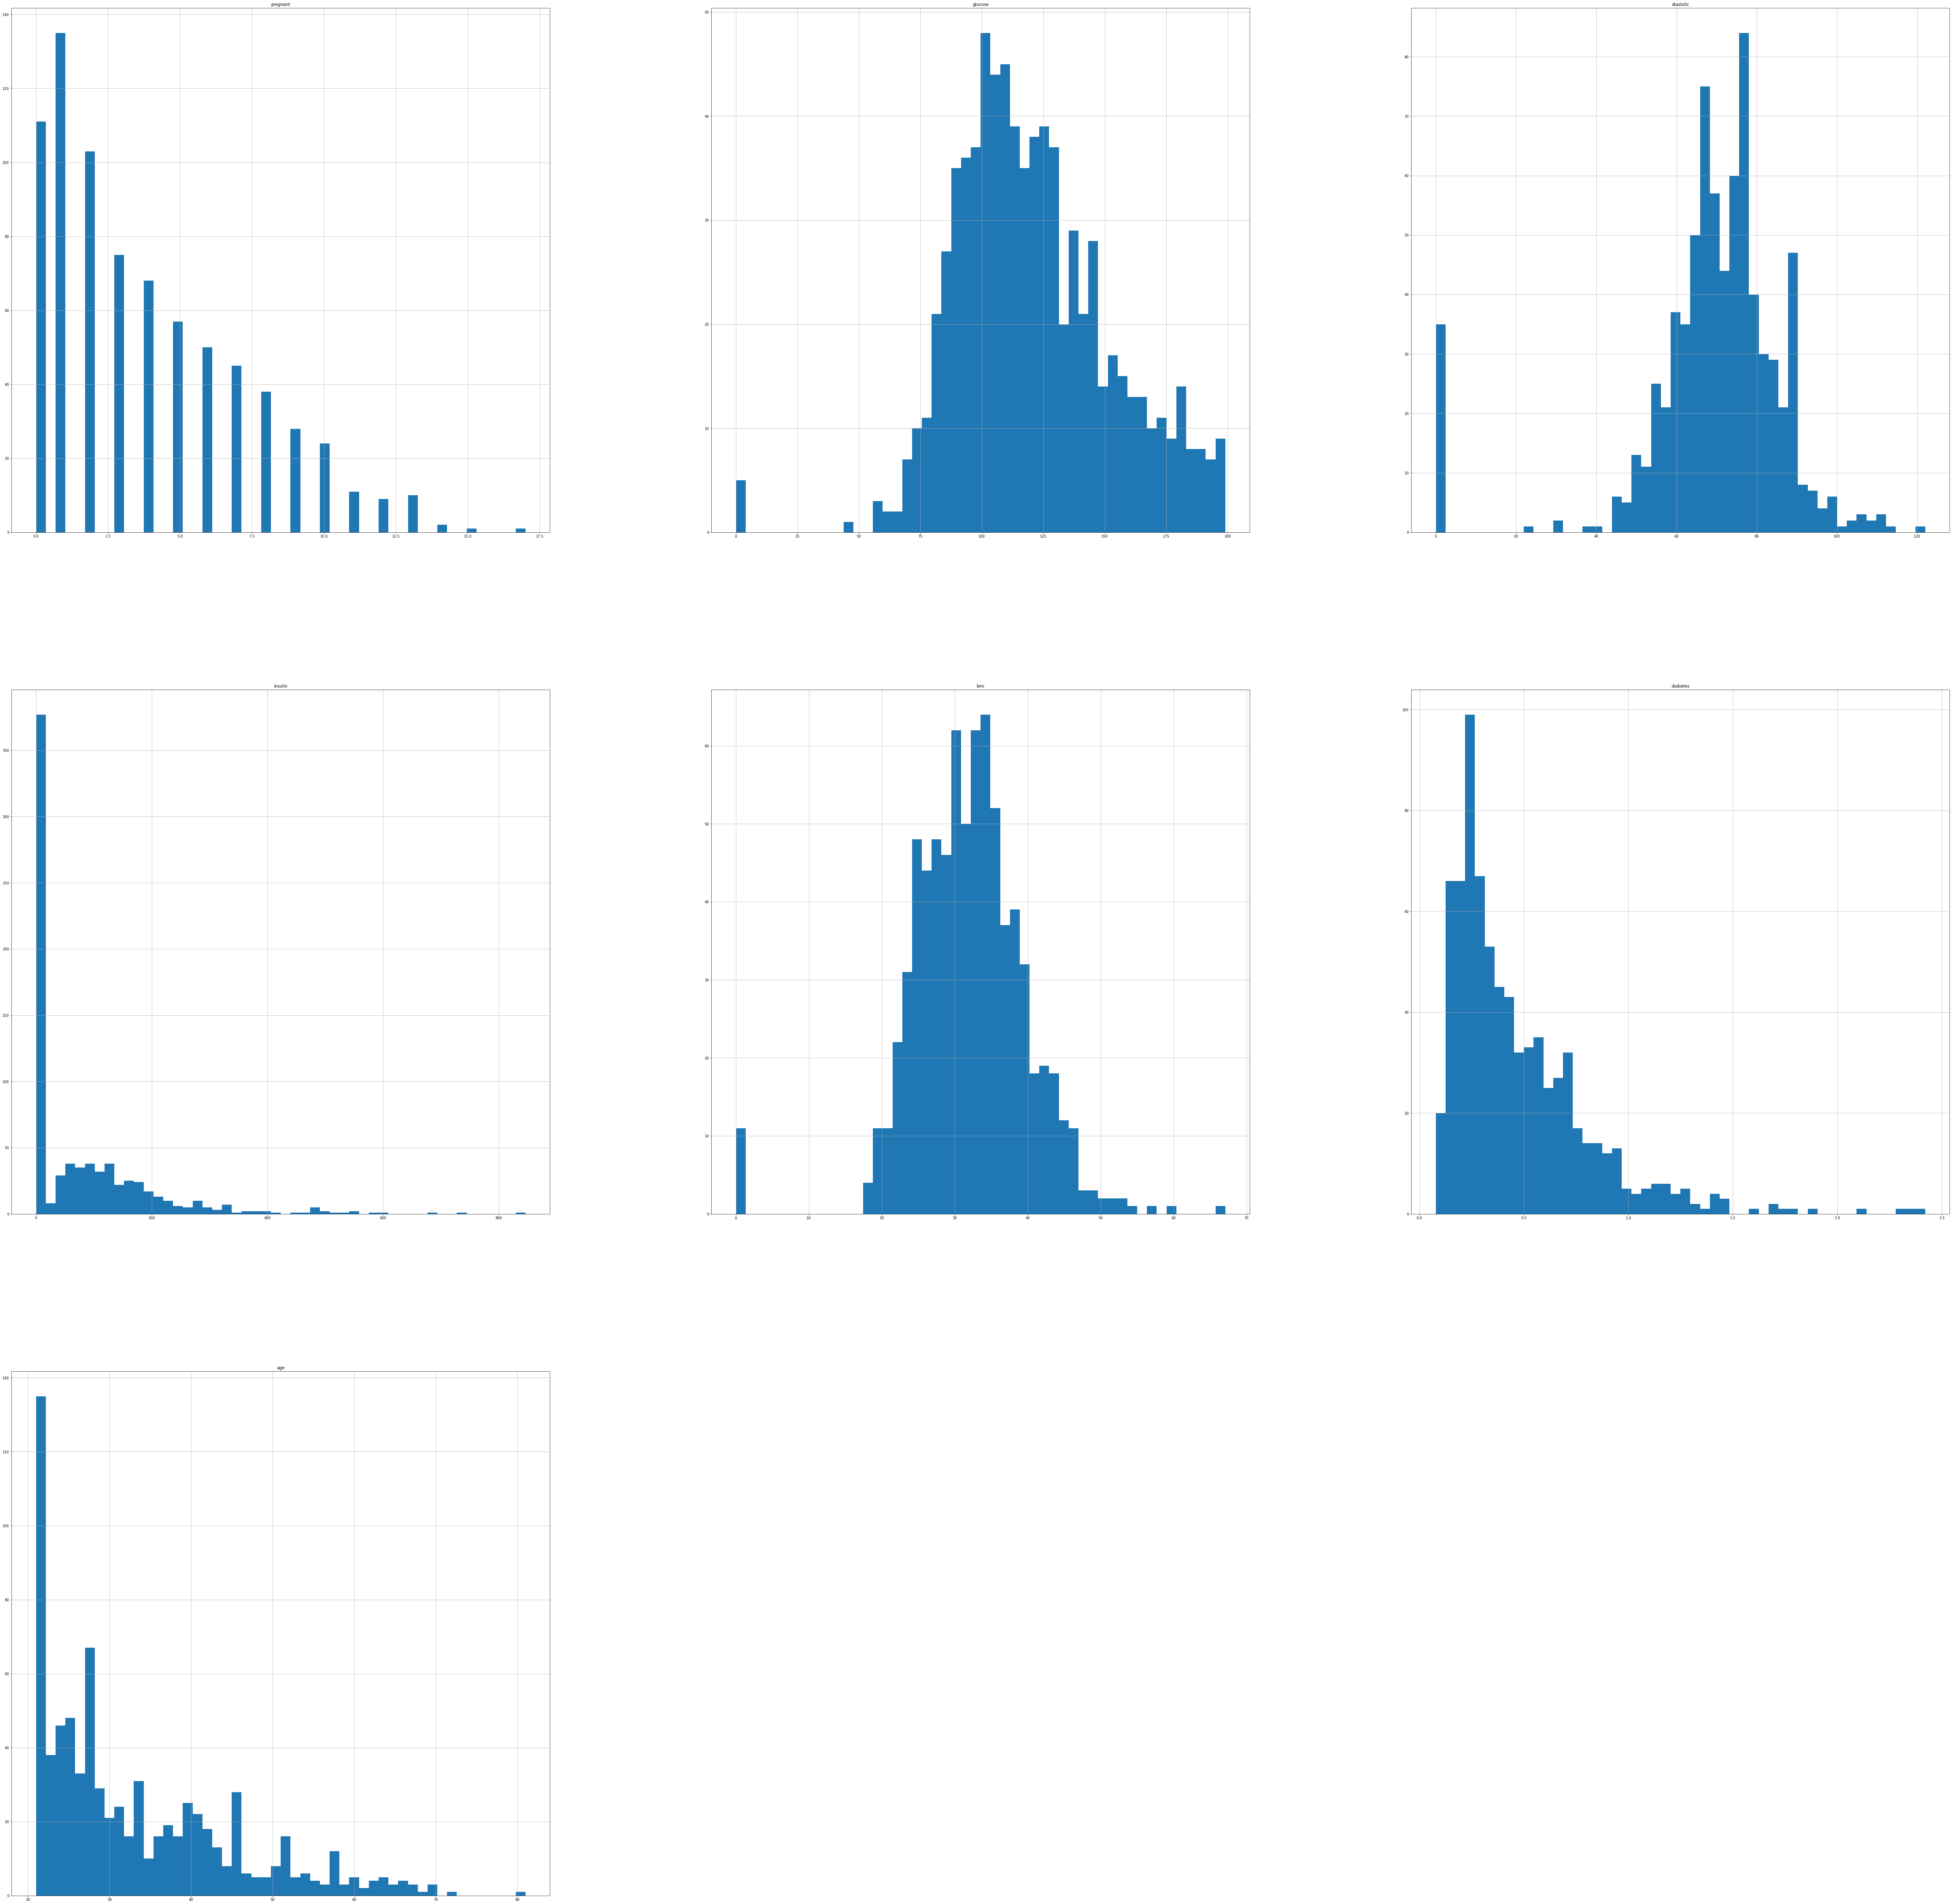

In [42]:

data.hist(bins = 50, figsize= (100,100))
plt.show()

In [ ]:
#there are missing values which are marked as 0 
# we cannot replace the missing values because this is healthcare data and each datapoint is crucial and mean/median cannot replace the missing value 


#Coorelation Check

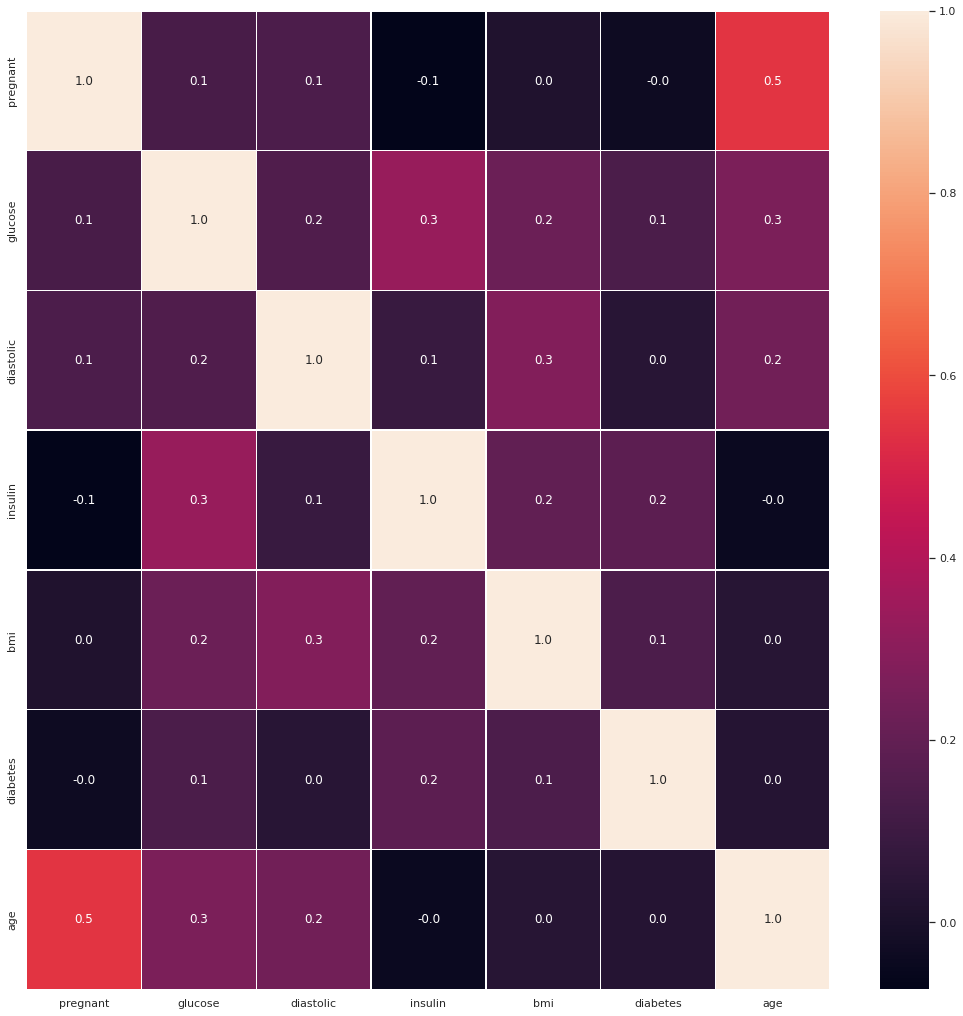

In [44]:
#correlation matrix with heat map - all features
#create a sub plot
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(),annot=True, linewidth=0.5, fmt='.1f', ax=ax)

Our Feaures are Not coorelated - we considering 70% correlation as important, but in the given case the correlation among varaibles is not this high

In [46]:
x.head()

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33


# Divide the data into test & Train (70-30)

In [47]:
# Split into training(70%) and validation data(30%)
from sklearn.model_selection import StratifiedShuffleSplit

def splitTrainTest(df, size):
  split = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=0)

  # dropping 'test' from the variables X and adding it to the target variable y
  for trainIndexes, testIndexes in split.split(x, y):
    x_train, y_train = x.iloc[trainIndexes], y.iloc[trainIndexes]
    x_test, y_test = x.iloc[testIndexes], y.iloc[testIndexes]

  return (x_train, y_train), (x_test, y_test)

# 20% validation and 80% training data
(x_train, y_train), (x_test, y_test) = splitTrainTest(data, 0.3)

In [48]:
x_train.head()

,pregnant,glucose,diastolic,insulin,bmi,diabetes,age
34,10,122,78,0,27.6,0.512,45
221,2,158,90,0,31.6,0.805,66
531,0,107,76,0,45.3,0.686,24
518,13,76,60,0,32.8,0.180,41
650,1,91,54,100,25.2,0.234,23


In [49]:
y_train.head()

34     0
221    1
531    0
518    0
650    0
Name: test, dtype: int64

In [50]:
# Splitted Data
print('X_train shape is ' , x_train.shape)
print('X_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (537, 7)
X_test shape is  (231, 7)
y_train shape is  (537,)
y_test shape is  (231,)


# Normalizing the Values - X train & Test

In [53]:
#calculating mean of training set, store it in a numpy array
train_means = np.array(x_train.mean())

#calculating max and min of training set, store it in a numpy array
train_max = np.array(x_train.max())
train_min = np.array(x_train.min())

X_train_norm = (x_train - train_means)/(train_max - train_min)
X_test_norm = (x_test - train_means)/(train_max - train_min)

# Upsampling the training dataset - Note1

In [54]:
#Initializing SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_smote, y_train_smote = sm.fit_resample(X_train_norm, y_train)

In [55]:
print('X_train_smote shape is ' , x_train_smote.shape) # Train data after SMOTE
print('y_train_smote shape is ' , y_train_smote.shape) # Train data after SMOTE
print('X_test shape is ' , x_test.shape) # Original test data
print('y_test shape is ' , y_test.shape) # Original test data

X_train_smote shape is  (700, 7)
y_train_smote shape is  (700,)
X_test shape is  (231, 7)
y_test shape is  (231,)


# Linear Regression Model

In [58]:
model = LinearRegression()
#train the model using training sets
model.fit(x_train_smote, y_train_smote)
#Predict the response for test dataset
y_pred = model.predict(X_test_norm)

# Logistic Regression Model

In [80]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver = 'liblinear', random_state = 143)
logistic_model.fit(x_train_smote, y_train_smote)

LogisticRegression(random_state=143, solver='liblinear')

# Evaluation using R2 - R Squared - Linear Regression

In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.3289060524165268


The R2 value is significantly low - this means that the model has not been tuned properly - We can do the following to increase the accuracy of our model:

1. Check the missing values - if the missing values cannot be found then drop the rows and clean the data. Cleaner dat gives better output predictions. 
2. Use Hypertuning of the parameters with Lasso/Ridge Regression instead of simple linear regression which has been used here.

# Evaluation of Logistic Regression Model

Accuracy score for Training data -  0.7619047619047619
Precision score - 0.6444444444444445
Recall score -  0.7160493827160493
F1 score -  0.6783625730994153
Confusion matrix for training set - 
 [[118  32]
 [ 23  58]]




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


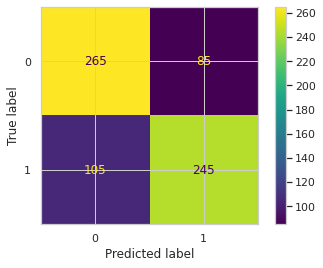

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Prediction on training data
y_pred = logistic_model.predict(X_test_norm)
print("Accuracy score for Training data - ", accuracy_score(y_test,y_pred))

#Get the precision score 
print("Precision score -", precision_score(y_test,y_pred))

# Get the recall score 
print("Recall score - ", recall_score(y_test,y_pred))

#Get the f1 score
print("F1 score - ", f1_score(y_test,y_pred))

#Get the confusion matrix
print("Confusion matrix for training set - \n", confusion_matrix(y_test,y_pred))

#Plotting confusion matrix
print("\n")
plot_confusion_matrix(logistic_model, x_train_smote, y_train_smote)
plt.show()